# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$.
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$).



<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$.
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$.

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?


### Solutions



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


plt.rcParams.update({'font.size': 22})

#### Exercise 02.1

To estimate the value of the integral $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ I applied two Monte Carlo methods using $M = 10^4$ random samples:

1. **Uniform sampling**: I generated M values uniformly distributed in the interval $[0,1]$, evaluated the integrand at those points, and computed the average. This estimate converges to the integral as the number of samples increases, following the law of large numbers.

2. **Importance sampling**: Instead of sampling uniformly, I drew samples from a non-uniform probability distribution $ g(x) = -2x + 2 $, which approximates the shape of the integrand (as suggested by its Taylor expansion near $ x = 1 $). For each sample $x$, I computed $ f(x)/g(x) $ and took the average. This method reduces variance and improves the accuracy of the estimate, especially when the sampling distribution better matches the integrand.


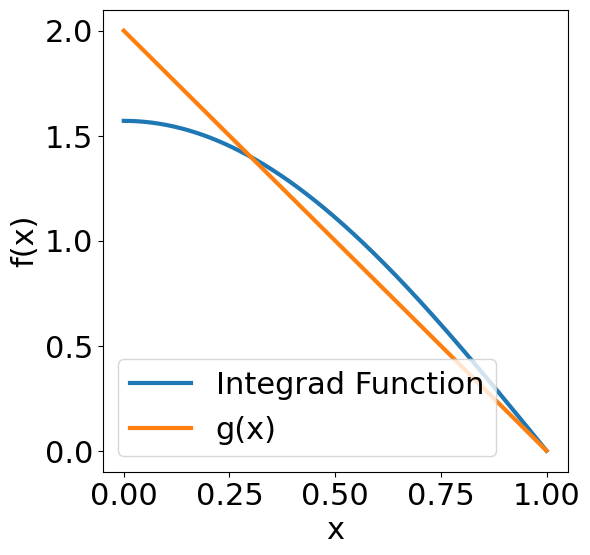

In [23]:
plt.figure(figsize=(6,6))
x = np.linspace(0, 1, 1000)
plt.plot(x, np.pi/2. * np.cos(x*np.pi/2. ), label='Integrad Function', lw=3)
plt.plot(x, -2.*x + 2., label='g(x)', lw=3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='lower left')

In both cases, the total number of throws $M$ was divided into $N=100$ blocks to compute the progressive average and associated statistical error. The plot below shows both estimates of $I$ minus the exact value of integral along with their uncertainties as a function of the number of blocks.

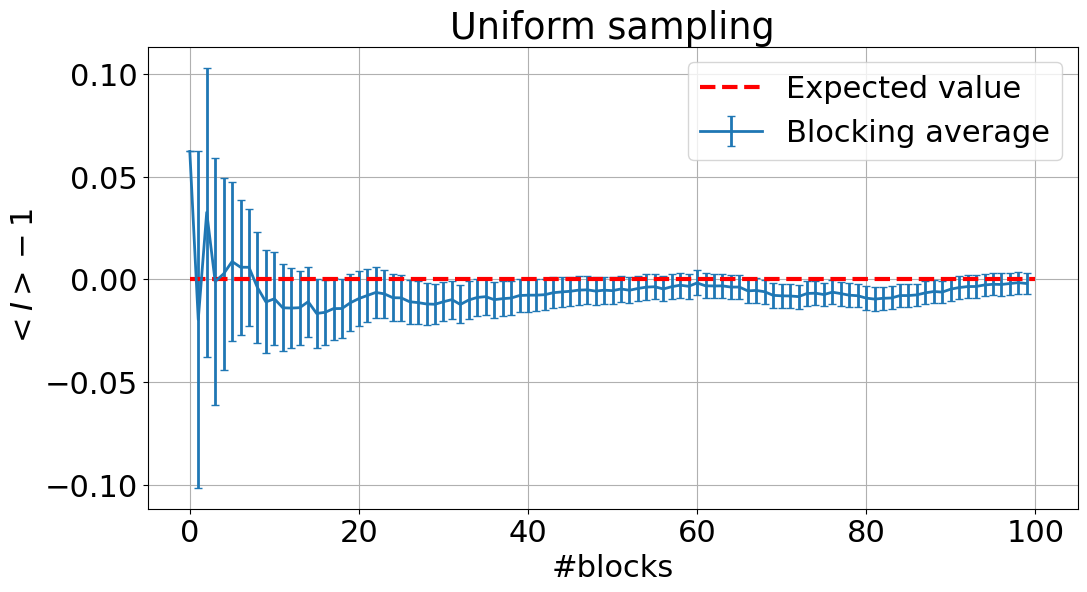

In [30]:
I = np.loadtxt('es_02.1/uniform_sampling.dat')

plt.figure(figsize=(12,6))
plt.errorbar(I[:,0]*1e-2, I[:,1]-1,yerr= I[:,2], capsize=3, lw=2, label='Blocking average')
plt.xlabel('#blocks')
plt.ylabel('$<I>-1$')
plt.title('Uniform sampling')
plt.hlines(0, 0, 100, colors='r', linestyles='dashed', label='Expected value', lw=3)
plt.grid(True)
plt.legend()
plt.show()


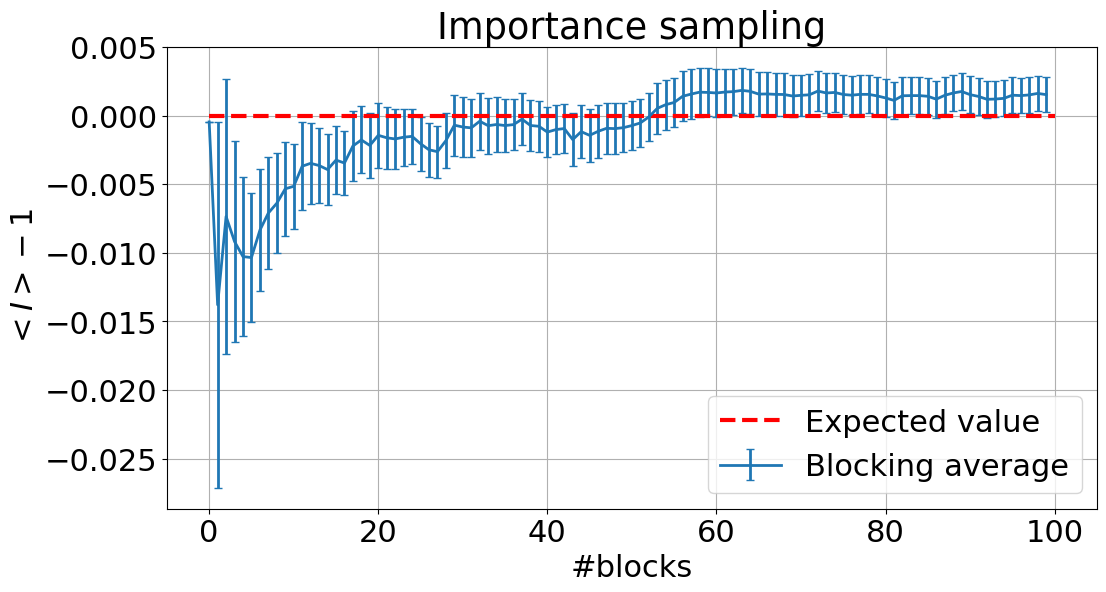

In [29]:
I_imp = np.loadtxt('es_02.1/importance_sampling.dat')

plt.figure(figsize=(12,6))
plt.errorbar(I_imp[:,0]*1e-2, I_imp[:,1]-1,yerr= I_imp[:,2], capsize=3, lw=2, label='Blocking average')
plt.xlabel('#blocks')
plt.ylabel('$<I>-1$')
plt.title('Importance sampling')
plt.hlines(0, 0, 100, colors='r', linestyles='dashed', label='Expected value', lw=3)
plt.grid(True)
plt.legend()
plt.show()

Both methods converge to the true value of the integral. The plot below clearly shows that the error on the integral estimate across blocks is significantly reduced when using importance sampling, demonstrating the variance reduction benefit of selecting an appropriate sampling distribution.


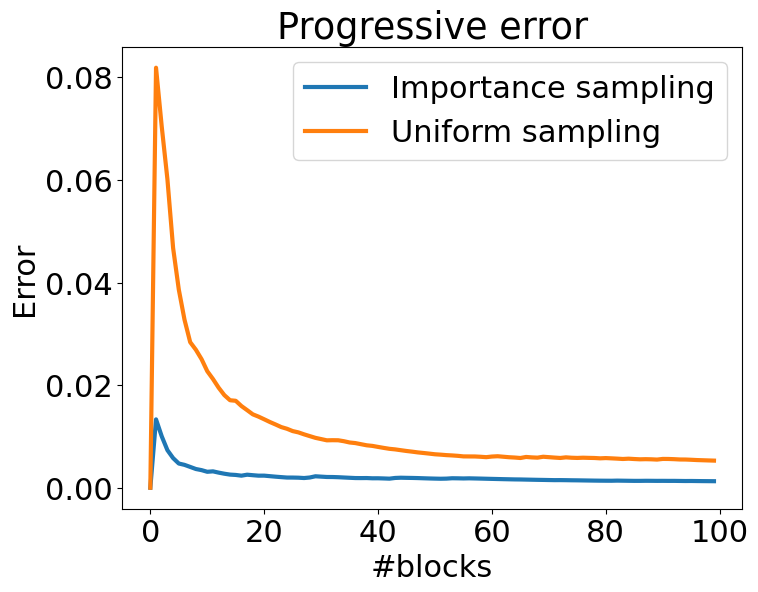

In [25]:
plt.figure(figsize=(8,6))
plt.plot(I_imp[:,0]*1e-2, I_imp[:,2], label='Importance sampling', lw=3)
plt.plot(I[:,0]*1e-2, I[:,2], label='Uniform sampling', lw=3)
plt.xlabel('#blocks')
plt.ylabel('Error')
plt.title('Progressive error')
plt.legend()
plt.show()


#### Exercise 02.2

The following plots show the root mean square displacement $ \sqrt{\langle |\vec{r}|^2 \rangle} $ as a function of the number of steps $ n_{step} $, for both the discrete and continuous random walk models. 
For each case, the average and statistical uncertainty were estimated by dividing the total number of simulations $M=10^4$ into $L=100$ blocks and analyzing the block fluctuations. 


To compute the uncertainty of $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ without relying on analytical error propagation, I applied a numerical approach. 
Instead of propagating the error through the square root function, I computed the mean squared displacement $ \langle r^2 \rangle $ for each blocks and then applied the square root to obtain an estimate of the root mean square distance. 
This gives a collection of independent estimates of $ \sqrt{\langle r^2 \rangle} $, from which I calculated the final average and the statistical uncertainty using the standard deviation for the blocking method. This approach allows for a direct and reliable estimation of the uncertainty, even though the observable is a non-linear function of the average.


In [6]:
def diffusive(x,k):  
    return k * np.sqrt(x)

k=1.0123585466794178


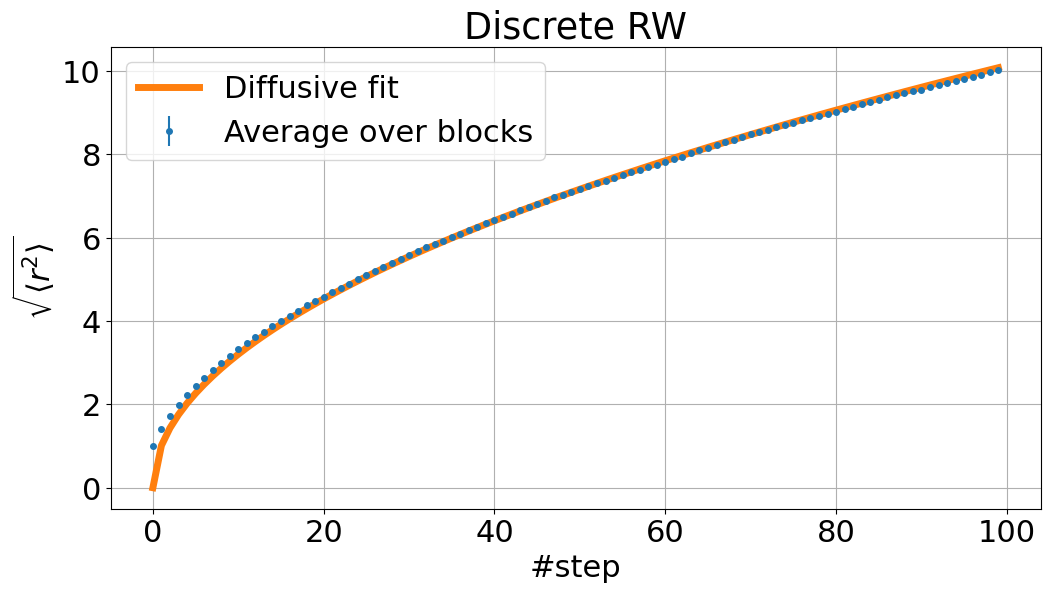

In [26]:
rw_discrete = np.loadtxt('es_02.2/random_walk_lattice.dat')

p_opt, p_cov = curve_fit(diffusive, rw_discrete[:,0], rw_discrete[:,1]) 
y_fit = diffusive(rw_discrete[:,0], p_opt[0])
print('k='+str(p_opt[0]))

plt.figure(figsize=(12,6))
plt.errorbar(rw_discrete[:,0], rw_discrete[:,1], yerr=rw_discrete[:,2],linestyle = " ", marker = "o", markersize = 4, label='Average over blocks')
plt.plot(rw_discrete[:,0], y_fit, label='Diffusive fit', lw=5)
plt.title("Discrete RW")
plt.xlabel('#step')
plt.ylabel(r'$\sqrt{\langle r^2 \rangle}$')
plt.legend()
plt.grid(True)
plt.show()

k=1.0116976988931061


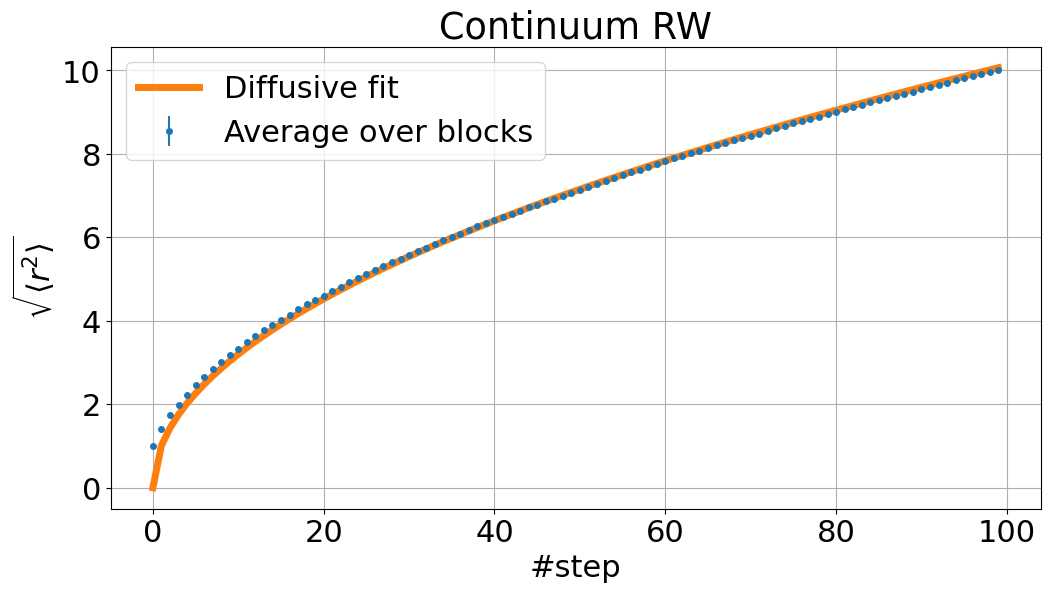

In [27]:
rw_continuum = np.loadtxt('es_02.2/random_walk_continuum.dat')

p_opt, p_cov = curve_fit(diffusive, rw_continuum[:,0], rw_continuum[:,1]) 
y_fit = diffusive(rw_continuum[:,0], p_opt[0])
# Print k
print('k='+str(p_opt[0]))

plt.figure(figsize=(12,6))
plt.errorbar(rw_continuum[:,0], rw_continuum[:,1], yerr=rw_continuum[:,2],linestyle = " ", marker = "o", markersize = 4, label='Average over blocks')
plt.plot(rw_continuum[:,0], y_fit, label='Diffusive fit', lw=5)
plt.title("Continuum RW")
plt.xlabel('#step')
plt.ylabel(r'$\sqrt{\langle r^2 \rangle}$')
plt.legend()
plt.grid(True)
plt.show()


I observe that both the discrete and continuous random walks exhibit diffusive behavior, as expected. This is confirmed by the fact that the fit of $\sqrt{\langle |\vec{r}|^2 \rangle}$ as a function of the number of steps $n_{step}$ closely follows the form
$
f(n_{step}) = k \sqrt{n_{step}} $
with fitted coefficients around $k \approx 1.012$ for the discrete RW and $k \approx 1.011$ for the continuous RW. This square-root dependence on time (or steps) is a clear signature of diffusion.


For a random walk with step length $a$ in $d$ dimensions, the mean squared displacement is related to the diffusion coefficient $D$ by:

$$
\langle |\vec{r}(t)|^2 \rangle = 2 d D t
$$
For a discrete random walk with step time $\delta t$, the diffusion coefficient is $D = \frac{a^2}{2 d \, \delta t}$.
Since the total time is related to the number of steps by $t = N \cdot \delta t$, we find:

$$
\langle |\vec{r}(N)|^2 \rangle = 2 d D N \cdot \delta t = a^2 \cdot N
$$
The **root mean squared displacement** is therefore:

$$
\sqrt{\langle |\vec{r}(N)|^2 \rangle} = a \cdot \sqrt{N}
$$
In my specific case, with $a = 1$ and $d=3$, this simplifies to:

$$
\sqrt{\langle |\vec{r}(N)|^2 \rangle} = \sqrt{n_{step}}
$$
This theoretical result explains why the fitted $k$ is expected to be $1$, consistently with the numerical findings.
